In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando o banco de Dados

In [2]:
df1 = pd.read_csv(r'C:\Users\diogo\Downloads\Day 7\DNC_order_items_dataset.csv')
df2 = pd.read_csv(r'C:\Users\diogo\Downloads\Day 7\DNC_order_reviews_dataset.csv')
df3 = pd.read_csv(r'C:\Users\diogo\Downloads\Day 7\DNC_orders_dataset.csv')
df4 = pd.read_csv(r'C:\Users\diogo\Downloads\Day 7\DNC_products_dataset.csv')

## visualizando o dataframe

In [3]:
display(df1.sample(3))
print(f"Data Frame completo {df1.shape}")

display(df2.sample(3))
print(f"Data Frame completo {df2.shape}")

display(df3.sample(3))
print(f"Data Frame completo {df3.shape}")

display(df4.sample(3))
print(f"Data Frame completo {df4.shape}")

,Unnamed: 0,order_id,order_item_id,product_id,price
56537,56537,8099510db9a578b9c9e341e0a4026d08,1,73326828aa5efe1ba096223de496f596,82.00
106513,106513,f20d2065cf43144b10631f85002fe6ca,1,5d096ee78b3150e1dcab797e13884824,64.99
42391,42391,608f10c703cf4a52527bfe0ae0afbddc,1,e2e2c6003104c5c3b265e60c980904d9,149.90


Data Frame completo (112650, 5)


,Unnamed: 0,review_id,order_id,review_score
5037,5037,fd7d77e750bfd5261c9f19b73f1d7109,4feb155d6d4d8b2ba3191d90655f3b99,5
2555,2555,a74576250ec01782aaecc685410ed4c4,3d56216916c4f573940c222a4d3e763d,5
80041,80041,199df57df33ab76a01e09666d32e2e8e,cb86e7fa5dcf2f86b0a038518514d891,5


Data Frame completo (99224, 4)


,Unnamed: 0,order_id,customer_id,order_status
52725,52725,3737d5e98a43749e8713ea1e2c9b5355,c512f620f76cc7b83e3eceeb72bfc6de,delivered
77357,77357,688777dd259c99e7554f3901ff653a54,d26f92dad3a2f62023e3411cc7ae6721,delivered
67026,67026,528d1ebb9f5a8601f7c1d21e05412b2f,c3fbf67004ec7cb05dbd7300afdbd4d8,delivered


Data Frame completo (99441, 4)


,Unnamed: 0,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14084,14084,f8fd25407acaa78a395f224cbdc062c8,cama_mesa_banho,59.0,883.0,1600.0,35.0,8.0,35.0
16901,16901,94972ba3b1856e8453d8a0b4d522aa36,cama_mesa_banho,52.0,489.0,200.0,16.0,10.0,16.0
28191,28191,177f62b739076126a879238444ccbf02,relogios_presentes,58.0,1352.0,240.0,13.0,12.0,14.0


Data Frame completo (32951, 9)


# Explorando banco de dados

In [134]:
#user_df = user_df.merge(df3,on=['order_id'])

## Merge do banco de dados dos rewies com o banco de dados de usuários e status da entrega

In [4]:
# merge nos banco de dados
userdf = df2.merge(df3,on=['order_id'])

##### Análise exploratória dois banco de dados

In [5]:
userdf.shape

(99224, 7)

In [6]:
userdf.head()

,Unnamed: 0_x,review_id,order_id,review_score,Unnamed: 0_y,customer_id,order_status
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1871,41dcb106f807e993532d446263290104,delivered
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,90488,8a2e7ef9053dea531e4dc76bd6d853e6,delivered
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,78882,e226dfed6544df5b7b87a48208690feb,delivered
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,27557,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,79505,5986b333ca0d44534a156a52a8e33a83,delivered


Foi realizado a limpeza do banco de dados de variáveis que não serão importante para o modelo, nessa etapa foram retiradas as variaveis de identificação dos review e index dos bataFrame antigo

In [7]:
userdf.drop(['Unnamed: 0_x','Unnamed: 0_y','review_id',],axis=1, inplace=True)

In [8]:
userdf.head()

,order_id,review_score,customer_id,order_status
0,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,delivered
1,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,delivered
2,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,delivered
3,658677c97b385a9be170737859d3511b,5,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,5986b333ca0d44534a156a52a8e33a83,delivered


In [11]:
userdf.shape

(99224, 4)

In [13]:
print('Porcentagem de produtos com a avaliação\n',userdf['review_score'].value_counts(1)*100)
print('Porcentagem do status do serviço\n',userdf['order_status'].value_counts(1)*100)

Porcentagem de produtos com a avaliação
 5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: review_score, dtype: float64
Porcentagem do status do serviço
 delivered      97.114609
shipped         1.051157
canceled        0.613763
unavailable     0.601669
invoiced        0.315448
processing      0.298315
created         0.003023
approved        0.002016
Name: order_status, dtype: float64



### Selecionados somente os produtos que foram entregue

Nesse modelo de recomendaçãoo foram selecionados somente os produtos que foram entregues, os  produtos que não foram entregue que foram retirados do modelo, independete do motivo da não entrega. Álem disso foi observado qual a porcentagem de qualificação dos produtos, buscando entender qual q média e media das avaliações.

In [14]:
user_df = userdf[userdf['order_status'] == 'delivered']

In [15]:
user_df.head()

,order_id,review_score,customer_id,order_status
0,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,delivered
1,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,delivered
2,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,delivered
3,658677c97b385a9be170737859d3511b,5,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,5986b333ca0d44534a156a52a8e33a83,delivered


In [143]:
user_df['review_score'].value_counts(1)

5    0.592211
4    0.197040
1    0.097612
3    0.082616
2    0.030521
Name: review_score, dtype: float64

In [144]:
# Média das avaliações 
user_df['review_score'].mean()

4.155716524320005

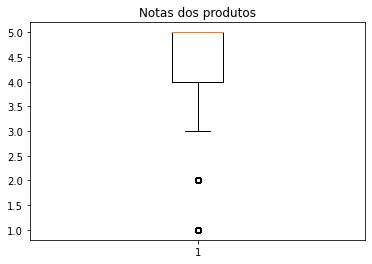

In [17]:
# Box plot dos usuarios que compraram mais produtos
fig4, ax4 = plt.subplots()
ax4.set_title('Notas dos produtos')
ax4.boxplot(user_df['review_score']);

In [19]:
#Quantidade de vezes que o usuário avaliou uma compra
user_aval = user_df.groupby(by='customer_id', as_index=False) \
  .agg({'review_score': pd.Series.nunique}) \
  .rename(columns={'review_score': 'avali_user'})

In [20]:
user_aval.head()

,customer_id,avali_user
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [21]:
user_aval['avali_user'].value_counts()

1    95643
2      189
Name: avali_user, dtype: int64

A maioria dos produtos são avaliados como positivos (5 e 4), fazendo a mediana ser em 5 e a médiana é de 4.15, além disso, poucos ususários avaliaram mais de uma vez uma compra, ou seja poucos usuários fizeram recompra

## Agregando o dataframe dos produtos

In [22]:
user_df1 = user_df.merge(df1,on=['order_id'])

In [23]:
user_df1.head()

,order_id,review_score,customer_id,order_status,Unnamed: 0,order_item_id,product_id,price
0,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,delivered,51033,1,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00
1,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,delivered,51034,2,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00
2,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,72472,1,be0dbdc3d67d55727a65d4cd696ca73c,79.79
3,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,delivered,109962,1,d1c427060a0f73f6b889a5c7c61f2ac4,149.00
4,658677c97b385a9be170737859d3511b,5,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,44664,1,52c80cedd4e90108bf4fa6a206ef6b03,179.99


In [24]:
user_df1.shape

(110013, 8)

In [25]:
#retirando colunas não utilizadas
user_df1.drop(['order_status','Unnamed: 0'],axis=1,inplace=True)

In [26]:
user_df1.head()

,order_id,review_score,customer_id,order_item_id,product_id,price
0,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,1,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00
1,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,2,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00
2,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,1,be0dbdc3d67d55727a65d4cd696ca73c,79.79
3,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,1,d1c427060a0f73f6b889a5c7c61f2ac4,149.00
4,658677c97b385a9be170737859d3511b,5,de6dff97e5f1ba84a3cd9a3bc97df5f6,1,52c80cedd4e90108bf4fa6a206ef6b03,179.99


# Produtos com as maiores notas

In [28]:
review = pd.DataFrame(user_df1.groupby(['product_id'])['review_score'].sum())
top20 = review.sort_values('review_score', ascending = False).head(20)

In [29]:
top20.rename(columns={'review_score': 'reviewScorTo'}, inplace=True)


In [30]:
avali_df=top20.merge(user_df1, left_index = True, right_on = 'product_id')

In [31]:
avali_df.head()

,reviewScorTo,order_id,review_score,customer_id,order_item_id,product_id,price
493,2093,d9aefa5d4ccd369c783f5121e069a470,5,1d4cdfbfb460efee13d334b446b54bdd,1,aca2eb7d00ea1a7b8ebd4e68314663af,69.9
789,2093,5982fca4536769e5024e12eb8b6f473c,5,60277a3e7abbb02da56b4a1ff79f985a,1,aca2eb7d00ea1a7b8ebd4e68314663af,69.9
919,2093,04105b54650921ca3246f52e6f175f46,5,5e67c2816f006a8ef69b3e9c8a5fab8f,1,aca2eb7d00ea1a7b8ebd4e68314663af,69.9
983,2093,d23640d83f7d582c4328ffd875e14966,4,cf93bb457c9af40c84cfe73ae4723fec,1,aca2eb7d00ea1a7b8ebd4e68314663af,69.9
984,2093,d23640d83f7d582c4328ffd875e14966,4,cf93bb457c9af40c84cfe73ae4723fec,2,aca2eb7d00ea1a7b8ebd4e68314663af,69.9


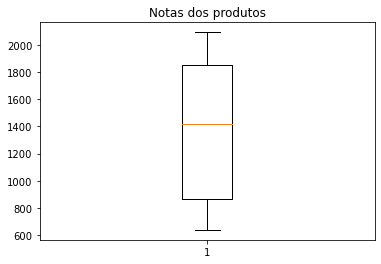

In [32]:
# Box plot dos usuarios que compraram mais produtos
fig4, ax4 = plt.subplots()
ax4.set_title('Notas dos produtos')
ax4.boxplot(avali_df['reviewScorTo']);

In [38]:
user_df.shape, user_df1['customer_id'].nunique(), user_df1['product_id'].nunique()

((96361, 4), 95832, 32072)

### Selecionar os 10.000 ususários mais ativos

Foi selecionado os 10000 usuários mais ativos por trazer uma representação das avalições nas compras na plataforma de compra 

In [146]:
produ_id = user_df1['product_id'].unique().tolist()
produ_id.sort()

user_count = user_df1.groupby(by='customer_id', as_index=False) \
  .agg({'product_id': pd.Series.nunique}) \
  .rename(columns={'product_id': 'product_count'})
shop_count = user_count.set_index('customer_id')
top1000_users = shop_count.sort_values('product_count', ascending = False).head(10000)

top_user_ids = top1000_users.index.tolist()
top_user_ids.sort()

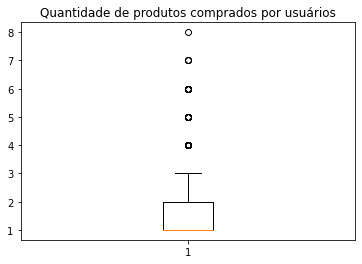

In [105]:
# Box plot dos usuarios que compraram mais produtos
fig4, ax4 = plt.subplots()
ax4.set_title('Quantidade de produtos comprados por usuários')
ax4.boxplot(top1000_users['product_count']);

Pelo box plot é possivel observar que a media dos usuários compra 2 produtos, com alguns poucos usários compra mais produtos

# Preparação dos dados para o modelo de recomendação de produtos mais comprados

Nesse modelo de recomendação o merge dos bancos (**produtos**,**cliente**, **Avaliações**) de dados foram realizados em etapas anteriores.

## Produtos mais comprados

In [147]:
count = user_df1.groupby(by='product_id', as_index=False) \
  .agg({'customer_id': pd.Series.nunique}) \
  .rename(columns={'customer_id': 'UserCount'})

buyCount = count.set_index('product_id')
top20prod = buyCount.sort_values('UserCount', ascending = False).head(20)

quantiBuy_df= top20prod.merge(user_df1, left_index = True, right_on = 'product_id')
quantiBuy_df.head()

,UserCount,order_id,review_score,customer_id,order_item_id,product_id,price
183,448,54b73f808b0ff25da4276773c30ac269,5,e154e499a4edf9f98c29f41476f96d1c,1,99a4788cb24856965c36a24e339b6058,89.9
231,448,935f0d2ac8ce7ce29f5712d2637ddb33,5,347542b2d5ff3990248773f2c840801b,1,99a4788cb24856965c36a24e339b6058,86.9
491,448,c830f223aae08493ebecb52f29aa48ca,5,af626bcc9c27c08077b02e6d3aa00c36,1,99a4788cb24856965c36a24e339b6058,89.9
723,448,d8253682886103126c169f93e8b46349,3,17cc65ff9ac50c525332662f3261a9bb,1,99a4788cb24856965c36a24e339b6058,89.9
845,448,0ccc28cc32fa5c8ca6a3b2d594700714,1,bfadadd0d97f4c52f859c1c4d809edf9,2,99a4788cb24856965c36a24e339b6058,89.9


In [149]:
top20prod.shape

(20, 1)

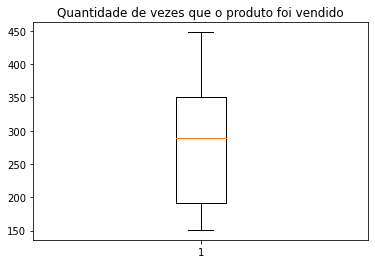

In [37]:
# Box plot dos usuarios que compraram mais produtos
fig4, ax4 = plt.subplots()
ax4.set_title('Quantidade de vezes que o produto foi vendido')
ax4.boxplot(quantiBuy_df['UserCount']);

In [123]:
(user_df1['product_id'].value_counts()).sum()

110013

In [145]:
(((user_df1['product_id'].value_counts(1)*100).head(2000)).sum())

45.54279948733331

In [130]:
(((user_df1['product_id'].value_counts(1)*100).head(5000)).sum())

62.126294165235024

# Porque escolher este modelo?
## Escolha do Modelo

Um total de 110.013 produtos diferentes sendo vendidos, contudo, cerca de 5.000 produtos conrresponde a 62,12% do total de vendas realizadas. Fato importante é que 2.000 produtos mais vendidos corresponde a 45,54% dos produtos mais vendidos, assim como modelo de recomendação vamos utilizar os 2.000 produtos mais vendidos, visto que termos uma perda de recomendação em cerca de 17% dos produtos mais vendido, porém uma economia de processamento de mais de 50%. Assim, no modelo final será utilizado apenas os 2.000 produtos mais vendidos como modelo de recomendação.

#### Esse é o motivo da escolha do modelo de recomendação para os 2.000 produtos mais vendidos

# Preparando o modelo de recomendação de produtos mais vendidos

Seleção dos 2.000 produtos mais vendidos e conversão deles em lista

In [111]:
top20pro = buyCount.sort_values('UserCount', ascending = False).head(2000)
top20p = top20pro.index.tolist()
top20p.sort()

Seleção dos top 20 produtos mais vendidos e conversão deles em lista

In [97]:
top20pr = top20.index.tolist()
top20pr.sort()

Importando a biblioteca de machie learning

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
# matriz de relacionamento top produtos
matriztop_prod_ratings = user_df1[user_df1["product_id"].isin(top20p)] \
  .pivot_table(index="product_id", columns="customer_id", values="review_score").fillna(0)

matriztop_prod_ratings.shape

(2000, 44413)

In [82]:
cos_produto = cosine_similarity(matriztop_prod_ratings)

print(cos_produto)
cos_produto.shape

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


(2000, 2000)

In [131]:
def recomendar(id_produto):
  print(f"Produto de interesse: {id_produto}")
  try:
    produto_idx = matriztop_prod_ratings.index.tolist().index(id_produto)
    closest_10_produto = np.argsort(-cos_produto[produto_idx])[1:11]
    print(f"Retornando 10 produtos mais próximos de: {id_produto}.")
    return matriztop_prod_ratings.index[closest_10_produto].tolist()
  except ValueError as e:
    print(f"{id_produto}, não está incluso na matriz de recomendação. Retornando os 20 mais avaliados")
    return top20pr

In [113]:
id_produto_interesse = "be0dbdc3d67d55727a65d4cd696ca73c" # entre os 2000 produtos mais vendidos
ids_10_mais_proximos = recomendar(id_produto_interesse)

ids_10_mais_proximos

Produto de interesse: be0dbdc3d67d55727a65d4cd696ca73c
Retornando 10 produtos mais próximos de: be0dbdc3d67d55727a65d4cd696ca73c.


['001b72dfd63e9833e8c02742adf472e3',
 'ab1106e227a745836a0dc83b374e2575',
 'aadff88486740e0b0ebe2be6c09476ae',
 'aa8d88eb4b9cb38894e33fa624c4287f',
 'aa70ae9ee9a798d44ae6e00ce6d82cb1',
 'aa5d6a9bd4be367ae1a3a29c323c7c11',
 'aa53b7499856e6df13008f34100cc336',
 'aa36c2127048efdcd47f4ad5b6b68810',
 'aa280035c50ba62c746480a59045eec4',
 'a9f480bfc49f0b85e8394e1cdf685b4e']

In [133]:
id_produto_interesse = "f8fd25407acaa78a395f224cbdc062c8" # produto não disponível na matriz de recomendação
ids_10_mais_vendidos = recomendar(id_produto_interesse)

ids_10_mais_vendidos

Produto de interesse: f8fd25407acaa78a395f224cbdc062c8
f8fd25407acaa78a395f224cbdc062c8, não está incluso na matriz de recomendação. Retornando os 20 mais avaliados


['154e7e31ebfa092203795c972e5804a6',
 '2b4609f8948be18874494203496bc318',
 '368c6c730842d78016ad823897a372db',
 '389d119b48cf3043d311335e499d9c6b',
 '3dd2a17168ec895c781a9191c1e95ad7',
 '422879e10f46682990de24d770e7f83d',
 '42a2c92a0979a949ca4ea89ec5c7b934',
 '53759a2ecddad2bb87a079a1f1519f73',
 '53b36df67ebb7c41585e8d54d6772e08',
 '5a848e4ab52fd5445cdc07aab1c40e48',
 '6cdd53843498f92890544667809f1595',
 '7c1bd920dbdf22470b68bde975dd3ccf',
 '99a4788cb24856965c36a24e339b6058',
 'a62e25e09e05e6faf31d90c6ec1aa3d1',
 'aca2eb7d00ea1a7b8ebd4e68314663af',
 'bb50f2e236e5eea0100680137654686c',
 'd1c427060a0f73f6b889a5c7c61f2ac4',
 'e0d64dcfaa3b6db5c54ca298ae101d05',
 'e53e557d5a159f5aa2c5e995dfdf244b',
 'f1c7f353075ce59d8a6f3cf58f419c9c']

### considerações finais sobre o modelo

Nesse modelo qualque produto que for comprado pelo usuário que estiver dentro da matriz dos 2.000 produtos mais vendido será recomendado um produto próximo a ele, porém, se o produto de interesse for outro que não esteja na lista dos 2.000 produtos de interesse será recomentado o top 20 produtos mais vendidos.
Optou por recomendar o top 20 produtos devido diversidade de produtos que possuem a venda 